# NOTES

* Barcodes in infercnv.observations.txt have the format ATCG-1-i, where i goes from 0 to 4:

    * 0 = p35_d0
    * 1 = p35_d10
    * 2 = p39_d0
    * 3 = p39_d28
    * 4 = p39_d113

* Genotype files:
    * trac.csv
    * trbc.csv
    * pd1.csv

* InferCNV Restults:
    * results_trac.txt
    * results_trbc.txt
    * results_pd1.txt

In [ ]:
#### LOAD LIBARIES ####
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
from IPython.display import display
import re
import os
import random
pd.options.display.max_columns = 40

In [ ]:
#### SUMMARIZE ANEUPLOIDY STATS AND ENRICHMENT FROM THOMAS'BREAKPOINT/ANEUPOIDY ANALYSIS ####

patient_dict = {"0":"p35_d0",
                "1":"p35_d10",
                "2":"p39_d0",
                "3":"p39_d28",
                "4":"p39_d113"}


tm_bp = "/groups/doudna/projects/CROPseq_05052022_Connor/" + \
        "Results/CART_Stanford/Thomas_inferCNV_Redo/TM_Breakpoints/"
files = [tm_bp+x for x in os.listdir(tm_bp)]
print(files)
nt_cols = [x + "_event" for x in chroms if x not in target_dict.values()]

rows = []

for file in files:
    target_gene = file.replace(tm_bp, "").split("_")[0]
    target_chromo = target_dict[target_gene]
    print(file, target_gene, target_chromo)
    temp = pd.read_csv(file)
    temp.rename(columns={"Unnamed: 0":"UMI"}, inplace = True)
    temp.set_index("UMI", inplace=True)

    for suffix, patient in patient_dict.items():
        summary_key = f"{patient}_{target_gene}"
        patient_indices = [x for x in list(temp.index) if x.endswith(suffix)]
        pat_time_df = temp.loc[patient_indices]

        # STATS NT Chromos
        nt_dict = Counter([item for sublist in pat_time_df[nt_cols].values for \
                           item in sublist])
        nt_cells = sum(nt_dict.values())
        nt_no = nt_dict["no_loss"]
        nt_pct_no = 100*nt_no/nt_cells
        nt_loss = nt_dict["lost_partial"] + nt_dict["lost_all"]
        nt_pct_loss = 100*nt_loss/nt_cells

        # STATS Targeted Chromos
        targeted_dict = Counter(pat_time_df[f"{target_chromo}_event"])
        t_cells = sum(targeted_dict.values())
        t_no = targeted_dict["no_loss"]
        t_pct_no = 100*t_no/t_cells
        t_loss = targeted_dict["lost_partial"] + targeted_dict["lost_all"]
        t_pct_loss = 100*(t_loss)/t_cells

        enrichment = t_pct_loss/nt_pct_loss

        row = [summary_key,
               #nt_no,
               nt_pct_no,
               #nt_loss,
               nt_pct_loss,
               #t_no,
               t_pct_no,
               #t_loss,
               t_pct_loss,
               enrichment]
        rows.append(row)

        summary_df = pd.DataFrame(rows, columns=["Sample",
                                                 #"Num_Cells_NoLoss_NonTargeted",
                                                 "Pct_NonTargeted_Chromo_NoLoss",
                                                 #"Num_Cells_Loss_NonTargeted",
                                                 "Pct_NonTargeted_Chromo_Loss",
                                                 #"Num_Cells_NoLoss_Targeted",
                                                 "Pct_Targeted_Chromo_NoLoss",
                                                 #"Num_Cells_Loss_Targeted",
                                                 "Pct_Targeted_Chromo_Loss",
                                                 "Aneuploidy_Enrichment"])
#summary_df.to_excel("Aneuploidy_Enrichment_in_vivo_samples.xlsx", index=False)

['/groups/doudna/projects/CROPseq_05052022_Connor/Results/CART_Stanford/Thomas_inferCNV_Redo/TM_Breakpoints/trbc_calls.csv', '/groups/doudna/projects/CROPseq_05052022_Connor/Results/CART_Stanford/Thomas_inferCNV_Redo/TM_Breakpoints/pd1_calls.csv', '/groups/doudna/projects/CROPseq_05052022_Connor/Results/CART_Stanford/Thomas_inferCNV_Redo/TM_Breakpoints/trac_calls.csv']
/groups/doudna/projects/CROPseq_05052022_Connor/Results/CART_Stanford/Thomas_inferCNV_Redo/TM_Breakpoints/trbc_calls.csv trbc chr7
/groups/doudna/projects/CROPseq_05052022_Connor/Results/CART_Stanford/Thomas_inferCNV_Redo/TM_Breakpoints/pd1_calls.csv pd1 chr2
/groups/doudna/projects/CROPseq_05052022_Connor/Results/CART_Stanford/Thomas_inferCNV_Redo/TM_Breakpoints/trac_calls.csv trac chr14


In [ ]:
# ALTERNATIVE: CCONFIRM COUNTER APPROPRIATE WITH COLUMN-WISE STATS
nt_dict = {}
nt_counts = {}
graph_dfs = {}
for col in nt_cols:
    temp = pat_time_df[col]
    n_cells = sum(temp.value_counts())
    col_counts = temp.value_counts()
    col_counts["Event"] = col
    col_percents = dict(100*temp.value_counts()/n_cells)

    missing = [x for x in loss_types if x not in list(temp.value_counts().keys())]
    for m in missing:
        col_percents[m] = 0
    col_percents["Event"] = col
    nt_dict[col] = col_percents
    nt_counts[col] = col_counts
nt_df = pd.DataFrame(nt_dict).iloc[:-1].mean(axis = 1)
nt_no_loss_pct = nt_df["no_loss"]
nt_loss = nt_df["lost_partial"] + nt_df["lost_all"]


['/groups/doudna/projects/CROPseq_05052022_Connor/Results/CART_Stanford/Thomas_inferCNV_Redo/TM_Breakpoints/trbc_calls.csv', '/groups/doudna/projects/CROPseq_05052022_Connor/Results/CART_Stanford/Thomas_inferCNV_Redo/TM_Breakpoints/pd1_calls.csv', '/groups/doudna/projects/CROPseq_05052022_Connor/Results/CART_Stanford/Thomas_inferCNV_Redo/TM_Breakpoints/trac_calls.csv']
/groups/doudna/projects/CROPseq_05052022_Connor/Results/CART_Stanford/Thomas_inferCNV_Redo/TM_Breakpoints/trbc_calls.csv trbc chr7
/groups/doudna/projects/CROPseq_05052022_Connor/Results/CART_Stanford/Thomas_inferCNV_Redo/TM_Breakpoints/pd1_calls.csv pd1 chr2
/groups/doudna/projects/CROPseq_05052022_Connor/Results/CART_Stanford/Thomas_inferCNV_Redo/TM_Breakpoints/trac_calls.csv trac chr14


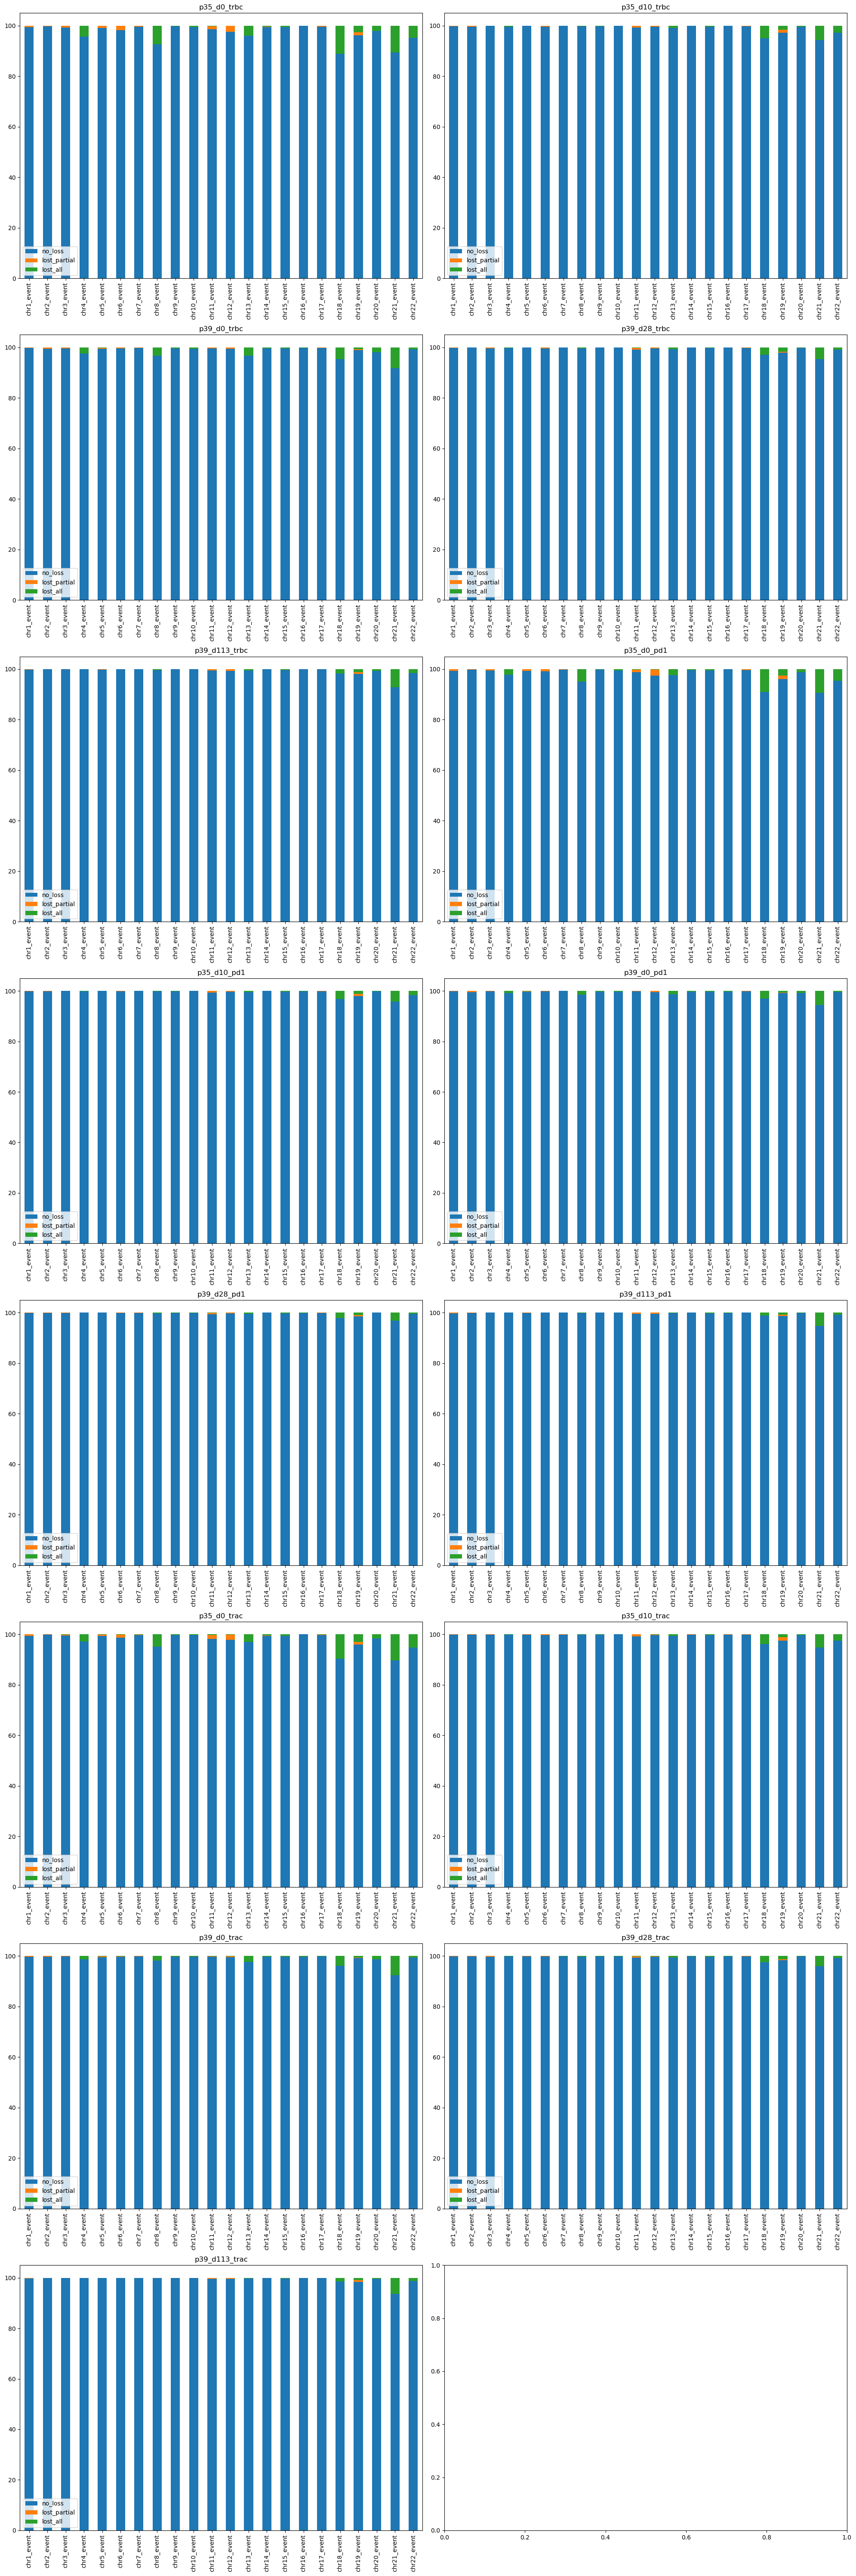

In [ ]:
#### GRAPH
# CHROMS
chroms = [f"chr{x}" for x in range(1,23)]
target_dict = {"pd1":"chr2", "trbc":"chr7", "trac":"chr14"}
patient_dict = {"0":"p35_d0",
                "1":"p35_d10",
                "2":"p39_d0",
                "3":"p39_d28",
                "4":"p39_d113"}
loss_types = ['no_loss', 'lost_partial', 'lost_all']
tm_bp = "/groups/doudna/projects/CROPseq_05052022_Connor/" + \
        "Results/CART_Stanford/Thomas_inferCNV_Redo/TM_Breakpoints/"
files = [tm_bp+x for x in os.listdir(tm_bp)]
print(files)

graph_dfs = {}
graph_dict = {}
graph_counts = {}

fig, ax = plt.subplots(nrows = 8, ncols = 2, figsize = (20,60))
axes = ax.ravel()
i = 0

for file in files:
    target_gene = file.replace(tm_bp, "").split("_")[0]
    target_chromo = target_dict[target_gene]
    print(file, target_gene, target_chromo)
    gene_df = pd.read_csv(file)
    gene_df.rename(columns={"Unnamed: 0":"UMI"}, inplace = True)
    gene_df.set_index("UMI", inplace=True)

    for suffix, patient in patient_dict.items():
        summary_key = f"{patient}_{target_gene}"
        patient_indices = [x for x in list(gene_df.index) if x.endswith(suffix)]
        pat_time_df = gene_df.loc[patient_indices]

        for col in [f"chr{x}_event" for x in range(1,23)]:
            temp = pat_time_df[col]
            n_cells = sum(temp.value_counts())
            col_counts = temp.value_counts()
            col_counts["Event"] = col
            col_percents = dict(100*temp.value_counts()/n_cells)

            missing = [x for x in loss_types if x not in list(temp.value_counts().keys())]
            for m in missing:
                col_percents[m] = 0
            col_percents["Event"] = col
            graph_dict[col] = col_percents
            graph_counts[col] = col_counts

        graph_df = pd.DataFrame(graph_dict).iloc[:-1]
        graph_dfs[summary_key] = graph_df
        graph_df.T.plot(kind = 'bar', stacked = True, title = summary_key, ax = axes[i])
        i+=1
plt.tight_layout()
plt.savefig("In_vivo_Anueploidy_per_Chromo.png")